<a href="https://colab.research.google.com/github/JoaoDaross/ProjetoFinalAwari/blob/main/ProjetoFinalAwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.imgur.com/YX6UATs.png"  width="160">

# **Projeto Final do Curso Intensivo de Ciência de Dados.**

**Turma:** Intensivo-Junho-20

**Autor:** João Guilherme Daross Brandão

# Exposição do problema

> Esta etapa consiste em apresentar um panorama da situação em que o projeto se encaixa, demonstrar o problema e como vou tentar resolver. 

<br/>
<br/>

## **O Projeto**

O projeto consiste em identificar o salário de uma vaga de trabalho levando em consideração o título do cargo, localização da sede, tamanho da empresa e faturamento.

<br/>
<br/>

### **Resumo sobre as seções**


*   **Coleta ou Importação dos dados:** O objetivo é coletar os dados, entender o tamanho do dataset, identificar as colunas e selecionar apenas as colunas que serão, a princípio, necessárias para a análise e se há dados faltantes.
<br/>

*   **Preparação dos dados:**
<br/>

*   **Análise exploratória:**
<br/>

*   **Modelagem:**
<br/>

*   **Comunicação e visualização:**
<br/>

# Coleta de Dados

Para realizar um projeto de ciência de
dados é necessário coletar dados. E para isso, possuímos basicamente duas opções:

<br/>

- Coleta de dados primária.

<br/>

- Coleta de dados secundária.

<br/>

Nesse projeto vamos utilizar a coleta de dados secundária que consiste em  coletar os dados de alguma base já
criada por outra pessoa, empresa ou organização.

<br/>

###**Conjunto de dados**

O conjunto de dados que iremos utilizar foi coletado da plataforma [Kaggle](https://www.kaggle.com/prithviraj7387/datascientistsalaries).

<br/>

### **Descrição do dados**

No arquivo [data_scraped.csv](https://github.com/JoaoDaross/ProjetoFinalAwari/blob/main/data_scraped.csv), você encontrará as seguintes colunas:

- **Unnamed: 0:** indice segundário;
- **Job Title:** Titulo do cargo;
- **Salary Estimate:** Salário estimado;
- **Job Description:** Descrição do trabalho;
- **Rating:** Ranking;
- **Company Name:** Nome da empresa;
- **Location:** Localização da empresa;
- **Headquarters:** Localização da sede;
- **Size:** Tamanho da empresa;
- **Founded:** Ano que a empresa foi fundada;
- **Type of ownership:** Tipo de sociedade;
- **Industry:** Industria da empresa;
- **Sector:** Setor da empresa;
- **Revenue:** Faturamento;
- **Competitors:** Não identificado.



---



---



> Primeiro vamos importar as bibliotecas que iremos utilizar no projeto

In [1]:
# Importando bibliotecas 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

> Selecionando os dados que vamos extrair as informações

In [2]:
#selecionando a fonte de dados
fonte = "https://raw.githubusercontent.com/JoaoDaross/ProjetoFinalAwari/main/data_scraped.csv"

> Leitura dos dados

In [3]:
#leitura de dados
df = pd.read_csv(fonte)

> Visualizar os dataset e identificar se as informações de cada coluna conferem com as descrições

In [4]:
# Visualisando as primeiras 5 linhas do dataset
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


> Identificando o tamanho do dataset em relação a quantidade de linhas e colunas

In [5]:
#visualizando o número de linhas e colunas
nlinhas, nColunas = df.shape
print(f'Este Dataset possui {nlinhas} linhas e {nColunas} colunas')

Este Dataset possui 956 linhas e 15 colunas


> Conferir se as colunas conferem com a descrição inicial

In [6]:
#visualizando nossas colunas
df.columns.values

array(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors'], dtype=object)

# Preparação dos dados

Após a coleta de dados, é preciso organizá-los de forma a facilitar a exploração e modelagem. 

<br/>

Durante essa etapa, alguns dos procedimentos que irei realizar:

<br/>

- Remoção de colunas e dados indesejados
- Remoção de dados duplicados
- Tratamento de dados ausentes
- Ajustes dos tipos de dados ( datetime, floats, integers, strings , etc...)
- Tratamento de Strings




---



---



> Inicialmente, identifiquei quatro colunas que não influênciam na nossa análise e modelo e vou remover

In [7]:
# Excluindo as colunas que não iremos utilizar.
df.drop('Unnamed: 0', axis=1, inplace=True) # Coluna idêntica ao índice do próprio pandas. 
df.drop('Job Description', axis=1, inplace=True) # Não existe uma padrão que faça sentido a utilização dos dados.
df.drop('Company Name', axis=1, inplace=True) # Dado não influência as principais variáveis que serão utilizadas.
df.drop('Competitors', axis=1, inplace=True) # Não identificado que tipo de informação essa coluna apresenta.

> Identifiquei que os dados faltantes foram alimentados com "-1"
<br/>
> Substitui para o padrão NaN ficando mais amigável e melhor manejar

In [8]:
# Convertendo todos os valos "-1" para NaN
df = df[['Job Title', 'Salary Estimate', 'Rating', 'Location',	'Headquarters', 'Size',	'Founded',	'Type of ownership',	'Industry',	'Sector',	'Revenue']].replace('-1', np.NAN)

> Agora, vamos identificar quantos valores faltantes existem em cada coluna

In [9]:
# Analisando a quantidade de vezes o NaN aparece em todo o dataset
df.isnull().sum()

Job Title              0
Salary Estimate      214
Rating                 0
Location               0
Headquarters          11
Size                  11
Founded                0
Type of ownership     11
Industry              39
Sector                39
Revenue               11
dtype: int64

> Seguindo a ordem das colunas, identifiquei que não existe valores faltantes na coluna **Job Title** e o principal problema é a não padronização
<br/>
> Padronizei essa coluna com os cinco principais cargos identificados
<br/>
**(Data Scientist, Data Engineer, Data Analyst, Business Intelligence, Intern)**

In [10]:
# Padronizando a coluna "Job Title"
df['Job Title'].replace(
    to_replace=['Sr. Enterprise Account Exec- Data Science / ML - NYC','Senior Manager, Epidemiologic Data Scientist','Senior Risk Data Scientist','Senior Data Scientist 4 Artificial Intelligence','Senior Scientist Protein/Oligonucleotides','Senior Insurance Data Scientist','Senior Research Analytical Scientist-Non-Targeted Analysis','Senior Clinical Lab Scientist, Clinical Lab Svcs - FT/Nights (8hr)','Senior Director Biometrics and Clinical Data Management','Sr. Scientist - Digital & Image Analysis/Computational Pathology','Sr Software Engineer (Data Scientist)','Sr. Data Scientist - Analytics, Personalized Healthcare (PHC)','Senior Data Scientist Artificial Intelligence','Senior LiDAR Data Scientist','Senior Data & Machine Learning Scientist','Senior Scientist - Biostatistician','Senior Scientist - Biostatistician ','Senior Data Scientist Oncology','Senior Scientist - Neuroscience','Sr Scientist, Immuno-Oncology - Oncology','Sr Expert Data Science, Advanced Visual Analytics (Associate level)','Senior Scientist - Toxicologist - Product Integrity (Stewardship)','Senior Scientist, Cell Pharmacology/Assay Development','Data Scientist SR','Scientist/Senior Scientist, Autoimmune','Senior Scientist, Logic Gated CAR T Cell Therapy','Senior Data Scientist / Machine Learning','Senior Scientist (Neuroscience)','Sr. Data Scientist II','Senior Scientist - Regulatory Submissions','Sr. Scientist, Quantitative Translational Sciences','Senior Data Scientist - AI Forecasting, Finance team','Senior Data Scientist - Algorithms','Sr. Data Scientist','Sr Data Scientist','Data Scientist, Senior','Senior Data Scientist Statistics','Senior Data Scientist','Data Scientist Manager','Data Science Manager','Senior Formulations Scientist II',
                'Jr. Data Scientist','Staff Data Scientist - Technology','Scientist, Immuno-Oncology','Machine Learning Research Scientist','Pricipal Scientist Molecular and cellular biologist','MED TECH/LAB SCIENTIST - LABORATORY','Associate Principal Scientist, Pharmacogenomics','Medical Lab Scientist - MLT','Quality Control Scientist','PL Actuarial-Lead Data Scientist','Customer Data Scientist','Data Scientist - Health Data Analytics','Scientist Manufacturing Pharma - Kentucky BioProcessing','Principal Scientist - Immunologist','Data Scientist / Machine Learning Expert','Medical Lab Scientist - MLT ','Data Scientist, Office of Data Science','Associate Director/Director, Safety Scientist','Principal Data Scientist with over 10 years experience','Staff Data Scientist','Digital Health Data Scientist','Data Scientist (Actuary, FSA or ASA)','Clinical Laboratory Scientist','Head Data Scientist – Image Analytics lead, Novartis AI Innovation Lab','UX Data Scientist (Python)','Principal Scientist, Hematology','Scientist - Analytical Services','Principal Data Scientist (Computational Chemistry)','Head Data Scientist – NLP lead, Novartis AI Innovation Lab','Data Scientist (Active TS SCI with Polygraph)','Managing Data Scientist/ML Engineer','Scientist, Bacteriology','Staff Scientist- Upstream PD','Scientist - Analytical Development - Pharmaceutics','RESEARCH COMPUTER SCIENTIST - RESEARCH ENGINEER - SR. COMPUTER SCIENTIST - SOFTWARE DEVELOPMENT','Principal Data Scientist (Computational Chemistry','Excel / VBA / SQL Data Analyst','Data Analytics Project Manager','College Hire - Data Scientist - Open to December 2019 Graduates','Scientist','Risk and Analytics IT, Data Scientist','Data Scientist in Artificial Intelligence Early Career','Scientist, Analytical Development','Director Data Science','Scientist, Product Development','Director II, Data Science - GRS Predictive Analytics','Scientist, Pharmacometrics','Data Scientist - Algorithms & Inference','Data Scientist - Systems Engineering','Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence','Product Engineer – Spatial Data Science and Statistical Analysis','Senior Imagery Scientist - SAR TO 11 #78 (TS/SCI)','Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad','Scientist Manufacturing - Kentucky BioProcessing','Machine Learning Engineer - Regulatory','Research Scientist – Security and Privacy','Technology-Minded, Data Professional Opportunities','Associate Environmental Scientist - Wildlife Biologist','Sr. Scientist Method Development','Research Scientist – Security and Privacy ','Computational Chemist/Data Scientist','Scientist, Upstream Process Development (Bioreactors)','Scientist - Biomarker and Flow Cytometry','Medical Lab Scientist','Principal, Data Science - Advanced Analytics','Principal Scientist, Chemistry & Immunology','Associate, Data Science, Internal Audit','Clinical Data Scientist','Scientist – Cancer Drug Discovery','Project Scientist - Auton Lab, Robotics Institute','PV Scientist','Staff Machine Learning Scientist, AI Foundation','Geospatial Software Developer and Data Scientist','Data Scientist - Quantitative','Front-End, Back-End, Fullstack Developers & Data Scientist / Researchers - Cleared OR CLEARABLE (Up to 25% Profit Sharing Benefit!)','VP, Data Science','Deep Learning/Computer Vision Scientist','Product Engineer – Data Science','Data Science Project Manager','Chief Scientist - Emerging Technology Center','Lab Head, Principle Scientist, Dupixent/Type 2 Inflammation & Fibrosis - Cambridge, MA','Data Systems Specialist 2','RESEARCH SCIENTIST - BIOLOGICAL SAFETY','Environmental Scientist','Data Scientist - Research','Clinical Document Review Scientist','R&D Sr Data Scientist','Associate Scientist/Scientist, Process Analytical Technology - Small Molecule Analytical Chemistry','Data Scientist - Alpha Insights','Chief Data Scientist','Scientist - CVRM Metabolism - in vivo pharmacology','Real World Evidence (RWE) Scientist','Data Scientist, Rice University','Clinical Data Manager','Director, Data Science','Sr. Scientist, Toxicology','Scientist 2, QC Viral Vector','Clinical Scientist, Clinical Development','Data Scientist - Consultant - National','Scientist, Molecular/Cellular Biologist','Research Scientist, Machine Learning Department','Healthcare Data Scientist','Research Scientist, Immunology - Cancer Biology','Senior Data Scientist – Visualization, Novartis AI Innovation Lab','Machine Learning Scientist','Senior Research Scientist - Embedded System Development for DevOps','Senior Quantitative Analyst','Process Development Scientist','Project Scientist','Chief Data Officer','Associate Scientist','Data Scientist Analyst','Manager of Data Science','Senior Scientist - Bioanalytical','Director, Precision Medicine Clinical Biomarker Scientist','Senior Data Scientist - R&D Oncology','Associate Scientist ','Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics','Customer Data Scientist/Sales Engineer','Data Scientist/ML Engineer','Associate Scientist, LC/MS Biologics','R&D Data Analysis Scientist','Data Scientist - Sales','Data Management Specialist','Senior Research Statistician- Data Scientist','Senior Spark Engineer (Data Science)','Pharmacovigilance Scientist (Senior Pharmacovigilance)','Data Scientist II','Data Scientist (Warehouse Automation)','Medical Laboratory Scientist','Medical Technologist / Clinical Laboratory Scientist','Food Scientist - Developer','Insurance Data Scientist','Research Scientist','Research Scientist / Principal Research Scientist - Multiphysical Systems','Sr. Data Scientist, Cyber-Security LT Contract','Senior Research Scientist-Machine Learning','Data Scientists','Assistant Director/Director, Office of Data Science','Associate Scientist / Sr. Associate Scientist, Antibody Discovery','Scientist, Stem Cells and Genomics','Sr. Manager, Data Science - Marketing Mix Media','Business Development - Data Supply Partnerships (Veraset)','Data Scientist in Translational Medicine','Customer Data Scientist/Sales Engineer (Bay','Environmental Data Specialist','Head Data Scientist, Predictive Analytics Lead AI Innovation Lab','R&D Specialist/ Food Scientist','MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB','Associate Research Scientist I (Protein Expression and Production)','Product Manager/Data Evangelist','Ag Data Scientist','Staff Scientist-Downstream Process Development','Principal Data Scientist','Lead Data Scientist','Machine Learning Engineer (NLP)','Associate Data Scientist/Computer Scientist','Staff Scientist','Senior Data Scientist: Causal & Predictive analytics AI Innovation Lab','Research Scientist or Senior Research Scientist - Computer Vision','Quality Control Scientist III- Analytical Development','Scientist I/II, Biology ', 'Scientist – Cancer Discovery, Molecular Assay', 'Principal Research Scientist/Team Lead, Medicinal Chemistry - Oncology', 'Principal Machine Learning Scientist', 'Manager, Safety Scientist, Medical Safety & Risk Management', 'Scientist I/II, Biology', 'Data Scientist - Bioinformatics', 'Senior Analytical Scientist', 'Tech Manager, Software Engineering - Data', 'Scientist, Biomarker Science', 'Sr. Scientist II' ],
    value='Data Scientist',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['Sr Data Engineer (Sr BI Developer)','Sr. Microsoft Data Engineer','Sr. Data Engineer (ETL Developer)','Senior Data Science Systems Engineer','Sr. BI Data Engineer III','Senior Data Engineer','Sr. Data Engineer','Sr. Data Engineer - Contract-to-Hire (Java)',
                'Data Modeler - Data Solutions Engineer','Enterprise Architect, Data','IT - Data Engineer II','Staff Data Engineer','Director II, Data Science - GRM Actuarial','Data Science Engineer - Mobile','Director - Data, Privacy and AI Governance','Staff Machine Learning Engineer','Associate Data Engineer','Staff BI and Data Engineer','Data Engineer 5 - Contract (Remote)','AWS Data Engineer','Lead Big Data Engineer','Data Engineer - Consultant (Charlotte Based)','Lead Data Engineer (Python)','Data Engineer 4 - Contract (Remote)','Data Engineer, Data Engineering and Artifical Intelligence','Software Data Engineer - College','Data Engineer I','ENVIRONMENTAL ENGINEER/SCIENTIST','Data Modeler','Data Engineering Analyst','Software Engineer (Data Scientist/Software Engineer) - SISW - MG','Data Engineer 4 - Contract','Principal Data Engineer, Data Platform & Insights','Software Engineer - Data Visualization','Data Modeler (Analytical Systems)','Data Platform Engineer','Data Operations Lead','Data Architect / Data Modeler','Data Engineer - ETL','MongoDB Data Engineer II','Big Data Engineer','SQL Data Engineer','Software Engineer Staff Scientist: Human Language Technologies','Data Engineer 5 - Contract','Spectral Scientist/Engineer','Data Engineer with R','Lead Data Engineer','Machine Learning Engineer','Weapons and Sensors Engineer/Scientist – Entry Level','Postdoc Scientist - T cell engineering','Data Engineer I - Azure','Sr. Data Engineer | Big Data SaaS Pipeline','Big Data Engineer - Chicago - Future Opportunity'],
    value='Data Engineer',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['Data Analyst Senior','Sr Data Analyst - IT','Sr. Data Analyst','Senior Data Analyst/Scientist','Jr. Business Data Analyst','Junior Data Analyst','Data Analytics Manager','Senior Data Analyst',
                'Marketing Data Analyst, May 2020 Undergrad','Data Science Analyst','Associate Data Analyst','Advanced Analytics Manager','Data Analyst 1, full-time contract worker for up to 12 months','Market Data Analyst','Market Data Analyst ','IT Associate Data Analyst','Corporate Risk Data Analyst (SQL Based) - Milwaukee or','Information Security Data Analyst','Clinical Data Analyst','Products Data Analyst II','Data Analytics Project Manager ','Lead Data Analyst','Digital Marketing & ECommerce Data Analyst','Salesforce Analytics Consultant','Senior Operations Data Analyst, Call Center Operations','Diversity and Inclusion Data Analyst','Systems Engineer II - Data Analyst','Radar Data Analyst','Associate Data Analyst- Graduate Development Program','Analytics - Business Assurance Data Analyst','Business Data Analyst','Data Analyst 2 (Missionary Department)','ATL - Data & Analytics (DA)','Revenue Analytics Manager','Supply Chain Data Analyst','System and Data Analyst','CONSULTANT– DATA ANALYTICS GROUP','Foundational Community Supports Data Analyst','Consultant - Analytics Consulting','Analytics Consultant','Business Data Analyst, SQL','Health Data Analyst/Developer','Financial Data Analyst','Data Analyst II','Web Data Analyst','MSP - Data & Analytics (DA)','Program/Data Analyst','CONSULTANT– DATA ANALYTICS GROUP ','Data Analyst / Scientist','Senior Engineer, Data Management Engineering','Data Analyst 2 (Missionary Department) ','Senior Health Data Analyst, Star Ratings','Data Analyst Level III','Data Analyst Level III ','Data Analyst - Asset Management','Data Analyst, Performance Partnership','Survey Data Analyst','Analytics Manager - Data Mart','Data Analyst Chemist - Quality System Contractor','Analytics Manager','Marketing Data Analyst','Data & Analytics Consultant (NYC)','E-Commerce Data Analyst','Insurance Financial Data Analyst','Lead Health Data Analyst - Front End'],
    value='Data Analyst',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['BI & Platform Analytics Manager','Business Intelligence Analyst / Developer','Business Intelligence Analyst'],
    value='Business Intelligence',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['Data Engineer Intern','Data Science Intern'],
    value='Intern',
    inplace=True
)

df['Job Title'].value_counts()

Data Scientist           612
Data Engineer            193
Data Analyst             133
Business Intelligence     16
Intern                     2
Name: Job Title, dtype: int64

> Segunda coluna. Coluna que traz informações númericas mas que esta bastante poluída com strings
<br/>
> Passo a passo:
- Transformar a coluna inicial em duas colunas(**Valor Mínimo,Valor Máximo)**;
- Excluir a coluna inicial**(Salary Estimate)**;
- Excluir os salários que não foram divulgados anualmente;
- Limpar as strings;
- Mudar o tipo das novas colunas;
- Converter o valor para milhares;
- Alimentar os valores faltantes com a mediana de cada coluna. 

In [11]:
# Transformando a coluna 'Salary Estimate' em duas colunas 'Valor Mínimo','Valor Máximo'
df[['Valor Mínimo','Valor Máximo']] = df['Salary Estimate'].str.split('-', expand=True)

In [ ]:
# Excluindo a coluna 'Salary Estimate'
df.drop('Salary Estimate', axis=1, inplace=True)

In [12]:
# Criando uma lista com o indíce dos salários divulgados por hora.
lista_indice = [197, 209, 240, 247, 257, 307, 337, 427, 437, 456, 464, 522, 523, 632, 652, 682, 694, 786, 787, 823, 854, 875, 919, 936]

# Excluindo esses indices
df = df.drop(lista_indice) 

In [13]:
# Limpando as colunas 'Valor Mínimo','Valor Máximo'
df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('K','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('K','')
df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('$','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('$','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('Glassdoor est.','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('(','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace(')','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('Employer est.','')
df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('Employer Provided Salary:','')

In [14]:
# Mudando o type das colunas 'Valor Mínimo','Valor Máximo'
df['Valor Máximo'] = df['Valor Máximo'].astype(float)
df['Valor Mínimo'] = df['Valor Mínimo'].astype(float)

In [15]:
# Convertendo para milhares
df['Valor Máximo'] = df['Valor Máximo'].multiply(1000)
df['Valor Mínimo'] = df['Valor Mínimo'].multiply(1000)

In [16]:
# Preenchendo os valores vazios com a mediana
df['Valor Máximo'] = df['Valor Máximo'].fillna(df['Valor Máximo'].median())
df['Valor Mínimo'] = df['Valor Mínimo'].fillna(df['Valor Mínimo'].median())

> A coluna **Revenue** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown / Non-Applicable**
<br/>
> Para preencher os valores faltantes segui o padrão identificado

In [17]:
# Substituindo os valores vazios por Unknown / Non-Applicable
df['Revenue'] = df['Revenue'].fillna('Unknown / Non-Applicable')

> A coluna **Size** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**
<br/>
> Para preencher os valores faltantes segui o padrão identificado

In [18]:
# Substituindo os valores vazios por Unknown
df['Size'] = df['Size'].fillna('Unknown')

> A coluna **Type of ownership** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**
<br/>
> Para preencher os valores faltantes segui o padrão identificado

In [19]:
# Substituindo  os valores vazios por Unknown
df['Type of ownership'] = df['Type of ownership'].fillna('Unknown')

> A coluna **Sector** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**
<br/>
> Para preencher os valores faltantes segui o padrão identificado

In [20]:
# Substituindo  os valores vazios por Unknown
df['Sector'] = df['Sector'].fillna('Unknown')

> A coluna **Industry** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**
<br/>
> Para preencher os valores faltantes segui o padrão identificado

In [21]:
# Substituindo  os valores vazios por Unknown
df['Industry'] = df['Industry'].fillna('Unknown')

> A coluna **Headquarters** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**
<br/>
> Para preencher os valores faltantes segui o padrão identificado

In [22]:
# Substituindo  os valores vazios por Unknown
df['Headquarters'] = df['Headquarters'].fillna('Unknown')

In [ ]:
# Transformando a coluna 'Headquarters' em duas colunas 'Cidade','Pais'
df[['Cidade_HQ','Pais_HQ']] = df['Headquarters'].str.split(',', expand=True)

# Substituindo  os valores vazios por Unknown
df['Pais_HQ'] = df['Pais_HQ'].fillna('Unknown')

# Transformando em paises
df["Pais_HQ"].replace(
    to_replace=[' CA', ' MD', ' FL', ' WA', ' NY', ' TX', ' VA', ' AR',
       ' NJ', ' MA', ' CO', ' ID', ' GA', ' MI', ' IL', ' CT', ' NE', ' AL', ' MO', ' RI',
       ' OH', ' PA', ' LA', ' DC', ' MN', ' AZ',' IN', ' SC', ' UT', ' TN', ' WI',
       ' AK', ' NV', ' IA', ' NC',' OR', ' PR'],
    value='USA',
    inplace=True
)



# Excluindo a coluna 'Headquarters' porque ela foi dividida em duas colunas
df.drop('Headquarters', axis=1, inplace=True)

In [ ]:
# Visualisando as primeiras 5 linhas do dataset 
df.head()

,Job Title,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Valor Mínimo,Valor Máximo,Cidade_HQ,Pais_HQ
0,Data Scientist,3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53000.0,91000.0,Goleta,USA
1,Data Scientist,3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63000.0,112000.0,Baltimore,USA
2,Data Scientist,4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80000.0,90000.0,Clearwater,USA
3,Data Scientist,3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56000.0,97000.0,Richland,USA
4,Data Scientist,2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86000.0,143000.0,New York,USA


In [ ]:
# Analisando a quantidade de vezes o NaN aparece em todo o dataset
df.isnull().sum()

Job Title            0
Rating               0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Valor Mínimo         0
Valor Máximo         0
Cidade_HQ            0
Pais_HQ              0
dtype: int64

In [ ]:
# Verificando se todas as colunas estão com a mesma quantidade de valores
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 955
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          932 non-null    object 
 1   Rating             932 non-null    float64
 2   Location           932 non-null    object 
 3   Size               932 non-null    object 
 4   Founded            932 non-null    int64  
 5   Type of ownership  932 non-null    object 
 6   Industry           932 non-null    object 
 7   Sector             932 non-null    object 
 8   Revenue            932 non-null    object 
 9   Valor Mínimo       932 non-null    float64
 10  Valor Máximo       932 non-null    float64
 11  Cidade_HQ          932 non-null    object 
 12  Pais_HQ            932 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.9+ KB


# IV - Análise exploratória

Após preparar os dados, precisamos entendê-los.

<br/>

Para isso, será utilizado procedimentos de estatística descritiva.

<br/>

- Verificar medidas de tendência central e de dispersão de variáveis que você
julgar importantes para a resolução do problema proposto.

<br/>

- Verificar a existência de correlações entre variáveis.

<br/>

- Verificar a distribuição dos dados através da plotagem de histogramas ou mesmo da aplicação de testes estatísticos com essa finalidade.

<br/>

- Gerar visualizações como gráficos de barras, gráfico de setores, histogramas, boxplots, gráficos de linha (sequência), etc...


In [ ]:
# Analisando o maior e menor salário independente da função.
print('O maior salário é $ {}  e o menor salário é $ {}'.format(df['Valor Máximo'].max(), df['Valor Mínimo'].min() ))

O maior salário é $ 306000.0  e o menor salário é $ 15000.0


In [ ]:
# Analisando max e min por Job Title
df.groupby('Job Title')['Valor Mínimo', 'Valor Máximo'].agg(['max', 'min'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Valor Mínimo          Valor Máximo          
                               max      min          max       min
Job Title                                                         
Business Intelligence      85000.0  53000.0     134000.0  105000.0
Data Analyst               99000.0  20000.0     178000.0   39000.0
Data Engineer             202000.0  37000.0     306000.0   66000.0
Data Scientist            200000.0  15000.0     289000.0   16000.0
Intern                     71000.0  71000.0     126000.0  126000.0

In [ ]:
# Analisando a média por Job Title e Size
df.groupby(['Job Title', 'Size'])['Valor Mínimo', 'Valor Máximo'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Valor Mínimo   Valor Máximo
Job Title             Size                                                
Business Intelligence 1001 to 5000 employees   72666.666667  125166.666667
                      201 to 500 employees     71000.000000  126000.000000
                      501 to 1000 employees    71000.000000  126000.000000
Data Analyst          1 to 50 employees        59833.333333  104833.333333
                      10000+ employees         49538.461538   82000.000000
                      1001 to 5000 employees   48538.461538   88653.846154
                      201 to 500 employees     53185.185185   95481.481481
                      5001 to 10000 employees  45666.666667   80555.555556
                      501 to 1000 employees    42535.714286   76928.571429
                      51 to 200 employees      58727.272727  106818.181818
Data Engineer         1 to 50 employees        70312.500000  128250.000000
                      10000+ employees         84769.230769  147076.923077
                      1001 to 5000 employees   76322.580645  137774.193548
                      201 to 500 employees     80222.222222  140481.481481
                      5001 to 10000 employees  74333.333333  134055.555556
                      501 to 1000 employees    63925.925926  112962.962963
                      51 to 200 employees      81883.720930  139069.767442
                      Unknown                  71000.000000  126000.000000
Data Scientist        1 to 50 employees        81277.777778  138972.222222
                      10000+ employees         85848.214286  146562.500000
                      1001 to 5000 employees   74903.846154  129913.461538
                      201 to 500 employees     74650.000000  133090.000000
                      5001 to 10000 employees  77208.333333  136208.333333
                      501 to 1000 employees    77172.839506  132666.666667
                      51 to 200 employees      83306.818182  138704.545455
                      Unknown                  88125.000000  132666.666667
Intern                201 to 500 employees     71000.000000  126000.000000
                      51 to 200 employees      71000.000000  126000.000000

In [ ]:
# Analisando principais medidas do dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,932.0,3.603004,1.079818,-1.0,3.3,3.8,4.2,5.0
Founded,932.0,1769.543991,605.754504,-1.0,1938.5,1993.0,2008.0,2019.0
Valor Mínimo,932.0,74753.218884,27103.240585,15000.0,60000.0,71000.0,84250.0,202000.0
Valor Máximo,932.0,129417.381974,38747.227314,16000.0,109000.0,126000.0,144000.0,306000.0


In [ ]:
# Padronizando as cores 
cor_valor_maximo =  "r"
cor_valor_minimo =  "b"

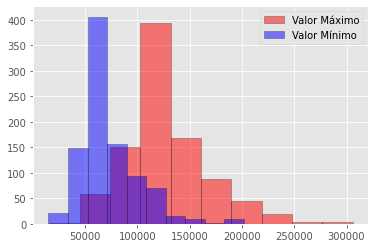

In [ ]:
# Aplicando um estilo aos plots
plt.style.use("ggplot")

# Criando gráfico
plt.hist(df['Valor Máximo'],ec = "k", label= 'Valor Máximo', alpha= 0.5, color = cor_valor_maximo)
plt.hist(df['Valor Mínimo'],ec = "k", label= 'Valor Mínimo', alpha= 0.5, color = cor_valor_minimo)

# Colocando a legenda no melhor lugar
plt.legend(loc='best')

# Mostrando gráfico
plt.show()

**Algumas Conclusões**

1 - Há maior concentração de Valor Máximo entre 100000 e 150000

2 - Há maior concentração de Valor Mínimo entre 50000 e 90000

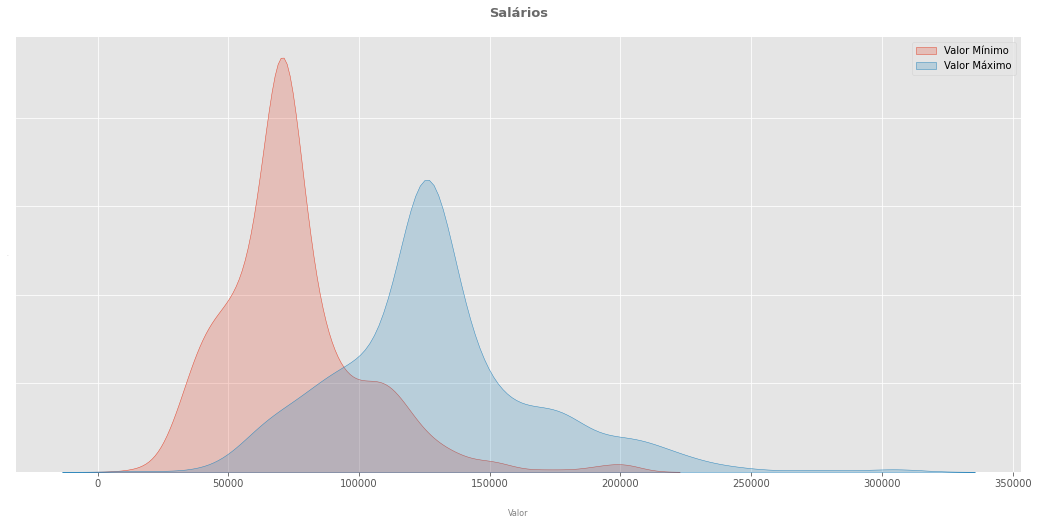

In [ ]:
# Configurando tamanho da figura
plt.figure(figsize=(18,8))

# Criando gráfico
g3 = sns.kdeplot(df['Valor Mínimo'], label = 'Valor Mínimo', shade = True)
g3 = sns.kdeplot(df['Valor Máximo'], label = 'Valor Máximo', shade = True)

# Criando titulo
plt.title('Salários',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

# Padronizando as legendas
plt.xlabel('Valor', color = 'grey', labelpad = 20, fontsize = 8)


g3.tick_params(axis ='y', labelsize=0, length = 0)
g3.set_yticklabels([])
plt.ylabel([], fontsize =0)

g3 = plt.legend()

**Algumas Conclusões**

1 - Os salários Máximo são mais "distribuídos".

2 - Os salários Mínimo tem uma alta concentração um pouco acima de $50000.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

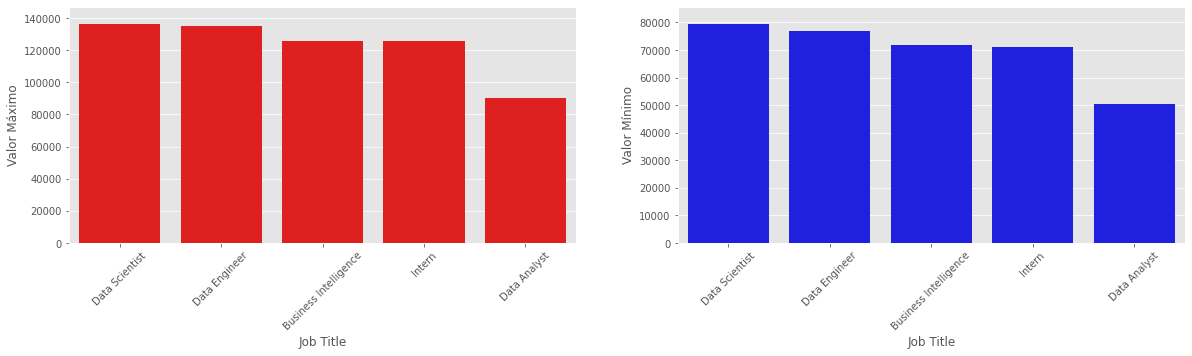

In [ ]:
funcoes_order = ['Data Scientist',
    'Data Engineer',
    'Business Intelligence',
    'Intern',
    'Data Analyst'
]

# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.barplot(x="Job Title", y="Valor Máximo", data=df, color= cor_valor_maximo, errwidth=False, order= funcoes_order)
plt.xticks(rotation=45)

##############

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Job Title", y="Valor Mínimo", data=df, color= cor_valor_minimo, errwidth=False, order= funcoes_order)
plt.xticks(rotation=45)

**Algumas Conclusões**

1 - Os salários de Data Analyst são menores do que o de Intern.

2 - Os salários de Business Intelligence e Intern são bem próximos.

3 - Os salários de Data Scientist e Data Engineer são bem próximos.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

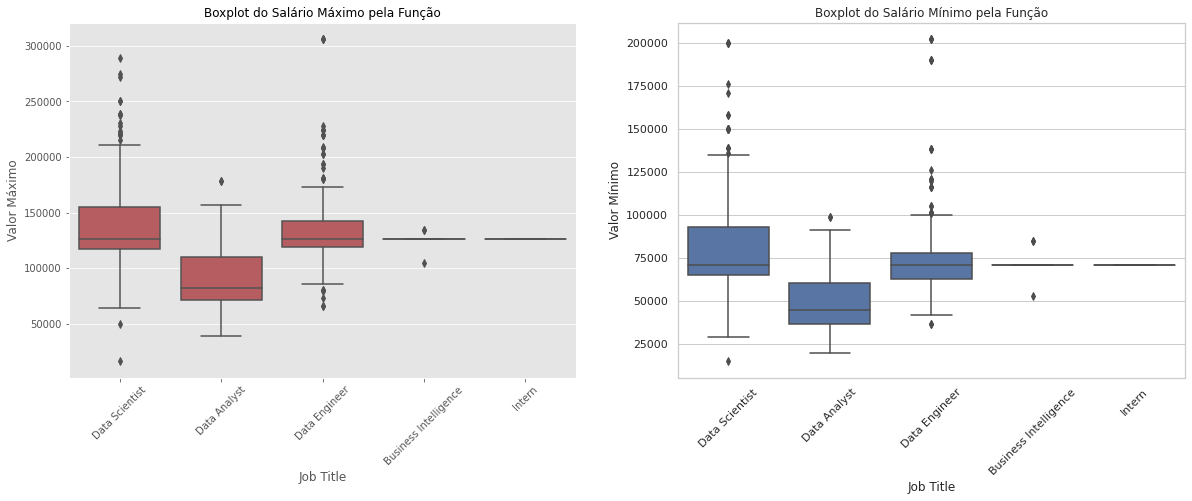

In [ ]:
# Criando gráfico
plt.figure(figsize=(20, 30))
plt.subplot(4, 2, 1)
sns.set_theme(style="whitegrid")
sns.boxplot(x="Job Title", y = "Valor Máximo", data = df, color= cor_valor_maximo)
plt.title("Boxplot do Salário Máximo pela Função")
plt.xticks(rotation=45)

##############

# Criando gráfico
plt.subplot(4, 2, 2)
sns.set_theme(style="whitegrid")
sns.boxplot(x="Job Title", y = "Valor Mínimo", data = df, color= cor_valor_minimo)
plt.title("Boxplot do Salário Mínimo pela Função")
plt.xticks(rotation=45)

**Algumas Conclusões**

1 - Os salários de Data Scientist e Data Engineer são bem próximos no gráfico anterior mas nesse gráfico podemos verificar que a média é praticamente a mesma mas a caixa de distribuição dos salários e bem maior no Data Scientist do que Data Engineer.

2 - O Data Engineer possui um outlier bem evidente no valor máximo superior. 

3 - O Data Scientist possui um outlier bem evidente na parte inferior de ambas variáveis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

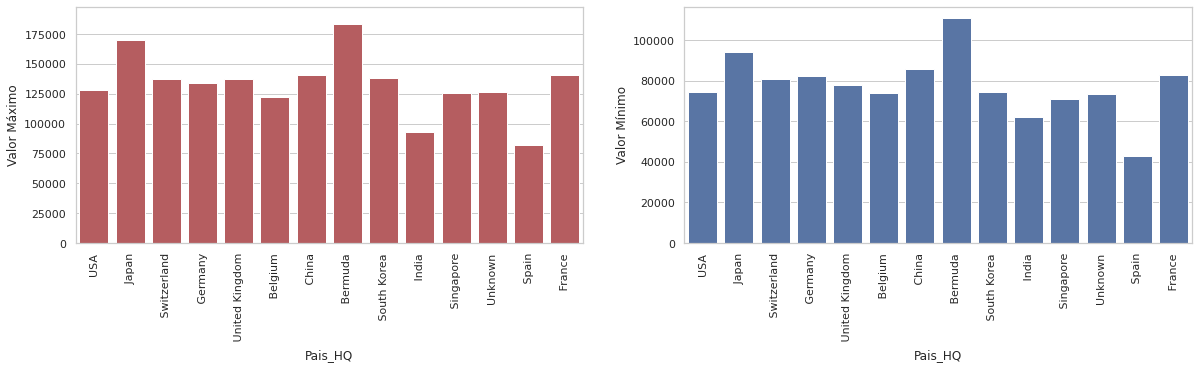

In [ ]:
# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
ax = sns.barplot(x="Pais_HQ",
            y="Valor Máximo", 
            data=df, 
            color= cor_valor_maximo,
            errwidth=False)
plt.xticks(rotation=90)

##############

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Pais_HQ", 
            y="Valor Mínimo", 
            data=df,
            color= cor_valor_minimo,
            errwidth=False)
plt.xticks(rotation=90)

**Algumas Conclusões**

1 - Japan e Bermuda tem os maiores salários.

2 - India e Spain tem os menores salários.

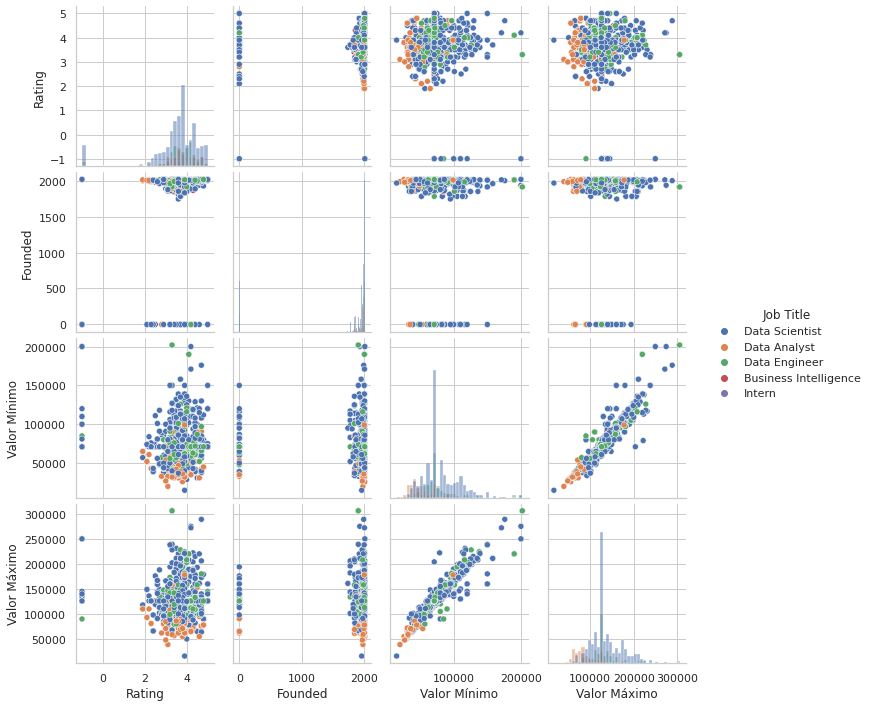

In [ ]:
# Criando gráfico
sns.pairplot(df, hue='Job Title', diag_kind="hist")

**Algumas Conclusões**

1 - Evidente correlação positiva entre os valores de salários.

Text(0.5, 1.0, 'Correlação das Variáveis')

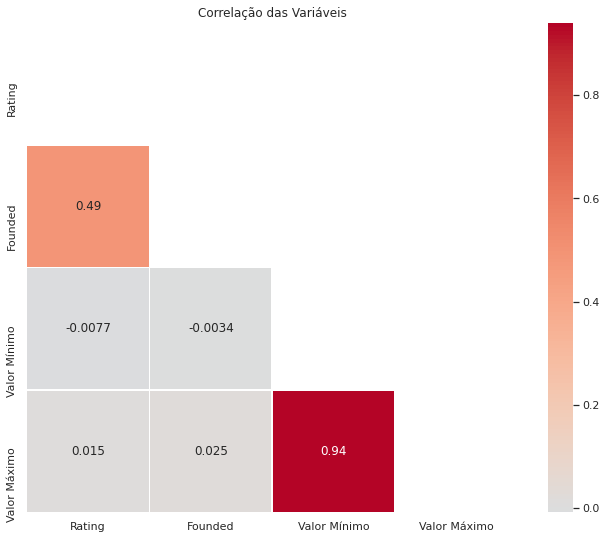

In [ ]:
#matriz
correlacao = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacao, mask=mask, cmap='coolwarm', annot=True, center=0, linewidths=.5)
plt.title("Correlação das Variáveis")

**Algumas Conclusões**

1 - Confirmada a correlação positiva em Valor Máximo e Valor Mínimo (0,94).

2 - Correlação pouco significativa entre Founded e Rating (0,49). 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

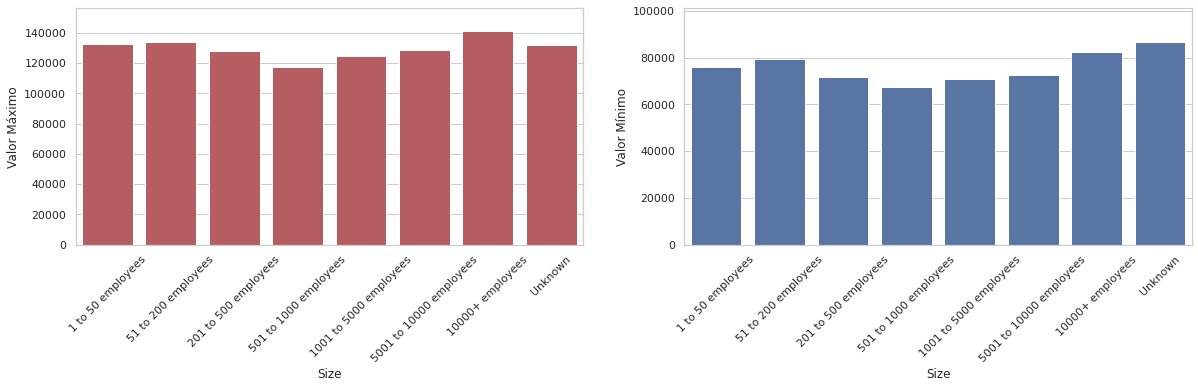

In [ ]:
tamanho_order = ['1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees',
    'Unknown'
]
# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.barplot(x="Size", y="Valor Máximo", data=df, color= cor_valor_maximo, errwidth=False, order= tamanho_order)
plt.xticks(rotation=45)

##############

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Size", y="Valor Mínimo", data=df, color= cor_valor_minimo, errwidth=False, order= tamanho_order)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

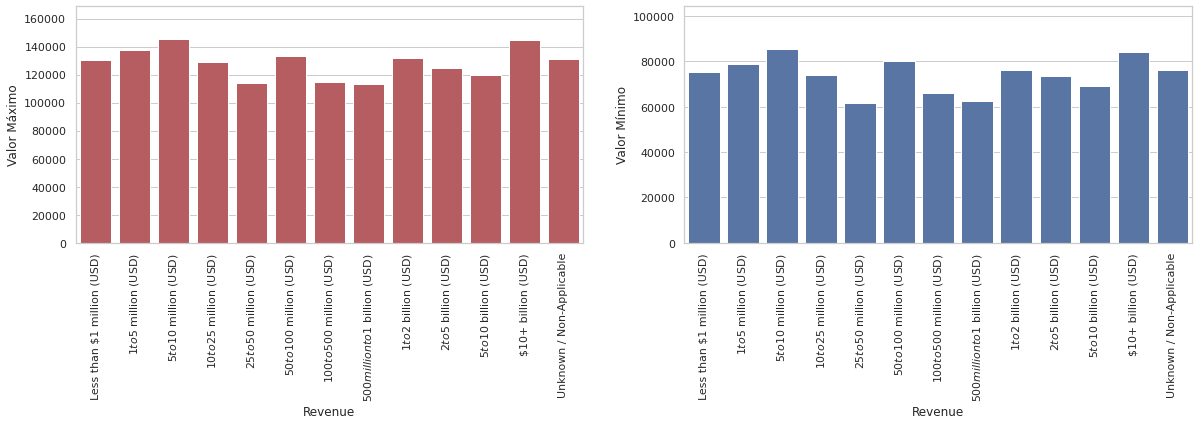

In [ ]:
faturamento_order = ['Less than $1 million (USD)',
    '$1 to $5 million (USD)',
    '$5 to $10 million (USD)',
    '$10 to $25 million (USD)',
    '$25 to $50 million (USD)',
    '$50 to $100 million (USD)',
    '$100 to $500 million (USD)',
    '$500 million to $1 billion (USD)',
    '$1 to $2 billion (USD)',
    '$2 to $5 billion (USD)',
    '$5 to $10 billion (USD)',
    '$10+ billion (USD)',
    'Unknown / Non-Applicable'
]

# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.barplot(x="Revenue", y="Valor Máximo", data=df, color= cor_valor_maximo, errwidth=False, order= faturamento_order)
plt.xticks(rotation=90)

##############

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Revenue", y="Valor Mínimo", data=df, color= cor_valor_minimo, errwidth=False, order= faturamento_order)
plt.xticks(rotation=90)

# V - Modelagem

Depois de compreender e ganhar intuições acerca dos dados, chega o momento de fato modelá-los.

<br/>

Durante essa etapa, alguns dos procedimentos que podem ser realizados são:

<br/>

- Divisão dos dados em dados de treino e teste

<br/>

- Criação de um benchmark (modelo inicial para comparações futuras)

<br/>

- Triagem de modelo(s) para utilização

<br/>

- Utilização de métricas de mensuração de performance dos algoritmos

<br/>

- Calibração dos hiperparâmetros do(s) algoritmo(s)


In [ ]:
df.head()

,Job Title,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Valor Mínimo,Valor Máximo,Cidade_HQ,Pais_HQ
0,Data Scientist,3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53000.0,91000.0,Goleta,USA
1,Data Scientist,3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63000.0,112000.0,Baltimore,USA
2,Data Scientist,4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80000.0,90000.0,Clearwater,USA
3,Data Scientist,3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56000.0,97000.0,Richland,USA
4,Data Scientist,2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86000.0,143000.0,New York,USA


**Categoricas** 

- Job Title
- Size
- Revenue
- Pais

**Numerica** 


- Rating
- Founded
- Valor Mínimo
- Valor Máximo

In [ ]:
# Tratando colunas categóricas
cat_cols = ['Job Title', 'Size', 'Revenue', 'Pais_HQ']
treino_cat = df[cat_cols]

In [ ]:
# usando one hot encoding
treino_cat = pd.get_dummies(treino_cat)

In [ ]:
treino_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 955
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Job Title_Business Intelligence           932 non-null    uint8
 1   Job Title_Data Analyst                    932 non-null    uint8
 2   Job Title_Data Engineer                   932 non-null    uint8
 3   Job Title_Data Scientist                  932 non-null    uint8
 4   Job Title_Intern                          932 non-null    uint8
 5   Size_1 to 50 employees                    932 non-null    uint8
 6   Size_10000+ employees                     932 non-null    uint8
 7   Size_1001 to 5000 employees               932 non-null    uint8
 8   Size_201 to 500 employees                 932 non-null    uint8
 9   Size_5001 to 10000 employees              932 non-null    uint8
 10  Size_501 to 1000 employees                932 non-null    uint

In [ ]:
num_cols = ['Rating', 'Founded', 'Valor Mínimo', 'Valor Máximo']
treino_num = df[num_cols]

In [ ]:
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 955
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        932 non-null    float64
 1   Founded       932 non-null    int64  
 2   Valor Mínimo  932 non-null    float64
 3   Valor Máximo  932 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 76.4 KB


In [ ]:
treino = pd.concat([treino_cat, treino_num], axis=1)

In [ ]:
treino.head()

,Job Title_Business Intelligence,Job Title_Data Analyst,Job Title_Data Engineer,Job Title_Data Scientist,Job Title_Intern,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Pais_HQ_ Belgium,Pais_HQ_ Bermuda,Pais_HQ_ China,Pais_HQ_ France,Pais_HQ_ Germany,Pais_HQ_ India,Pais_HQ_ Japan,Pais_HQ_ Singapore,Pais_HQ_ South Korea,Pais_HQ_ Spain,Pais_HQ_ Switzerland,Pais_HQ_ United Kingdom,Pais_HQ_USA,Pais_HQ_Unknown,Rating,Founded,Valor Mínimo,Valor Máximo
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.8,1973,53000.0,91000.0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.4,1984,63000.0,112000.0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.8,2010,80000.0,90000.0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.8,1965,56000.0,97000.0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.9,1998,86000.0,143000.0


In [ ]:
treino.shape

(932, 44)

In [ ]:
# Dividindo os dados de treino e teste (X e y) Variável alvo = Valor Máximo.

X = treino.drop('Valor Máximo', axis=1)
y = treino['Valor Máximo']


from sklearn.model_selection import train_test_split


#vamos estratificar nossas amostras para que nosso teste tenha a mesma proporção de classes que nosso treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression # importa o modelo

regr = LinearRegression() # cria o modelo

regr.fit(X_train, y_train) # treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)

In [ ]:
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.91
R2 no set de teste: 0.87


In [ ]:
# Dividindo os dados de treino e teste (X e y) Variável alvo = Valor Máximo.

X = treino.drop('Valor Mínimo', axis=1)
y = treino['Valor Mínimo']


from sklearn.model_selection import train_test_split


#vamos estratificar nossas amostras para que nosso teste tenha a mesma proporção de classes que nosso treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression # importa o modelo

regr = LinearRegression() # cria o modelo

regr.fit(X_train, y_train) # treina o modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)

In [ ]:
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.91
R2 no set de teste: 0.86


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8624042704382797

In [ ]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor(strategy='mean')
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-0.001005632686938318

In [ ]:
from sklearn.linear_model import RidgeCV, Lasso, ElasticNet, LassoLars, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg_list = [RidgeCV(),
            SVR(),
            KNeighborsRegressor(),
            RandomForestRegressor(),
            AdaBoostRegressor(),
            GradientBoostingRegressor(),
            MLPRegressor(),
            # LGBMRegressor(), 
            # XGBRegressor(objective='reg:squarederror')
            ]

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

for reg in reg_list:
    print(f'Treinando o modelo {reg.__class__.__name__}')
    reg.fit(X_train, y_train)
    
    train_score = reg.score(X_train, y_train)
    cv_scores = cross_val_score(reg, X_train, y_train)
    test_score = reg.score(X_test, y_test)
    
    print(f"R² treino: {train_score}")
    print(f"R² validação : {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}")
    print(f"R² teste: {test_score}")
    print('-'*70)

Treinando o modelo RidgeCV
R² treino: 0.9056017252911984
R² validação : 0.89 +- 0.02
R² teste: 0.8636306291922106
----------------------------------------------------------------------
Treinando o modelo SVR
R² treino: -0.017287056661578152
R² validação : -0.02 +- 0.01
R² teste: -0.011773403596150755
----------------------------------------------------------------------
Treinando o modelo KNeighborsRegressor
R² treino: 0.9357256180220067
R² validação : 0.90 +- 0.02
R² teste: 0.8536860285269373
----------------------------------------------------------------------
Treinando o modelo RandomForestRegressor
R² treino: 0.9929094577899038
R² validação : 0.94 +- 0.02
R² teste: 0.8831652739330188
----------------------------------------------------------------------
Treinando o modelo AdaBoostRegressor
R² treino: 0.9133188036519786
R² validação : 0.90 +- 0.02
R² teste: 0.8354335602771046
----------------------------------------------------------------------
Treinando o modelo GradientBoostingR

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R² treino: 0.8789243645260907
R² validação : 0.87 +- 0.02
R² teste: 0.8568881090204725
----------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Bonus: testando com todos os regressores do sklearn
from sklearn.utils import all_estimators

estimators = all_estimators(type_filter='regressor')

relatorio = {'nome':[],
             'train_score':[],
             'cv_scores_mean':[],
             'test_score':[],
             'estimador':[]
             }

ignore_list = ['IsotonicRegression',
 'MultiOutputRegressor',
 'ElasticNet',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'RadiusNeighborsRegressor',
 'RegressorChain',
 'StackingRegressor',
 'VotingRegressor']

In [ ]:
for name, RegressorClass in estimators:
    if name not in ignore_list:
        print(f'Treinando o modelo {name}')
        reg = RegressorClass()
        reg.fit(X_train, y_train)

        train_score = reg.score(X_train, y_train)
        cv_scores = cross_val_score(reg, X_train, y_train)
        test_score = reg.score(X_test, y_test)

        print(f"R² treino: {train_score}")
        print(f"R² validação: {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}")
        print(f"R² teste: {test_score}")
        print('-'*70)

        relatorio['nome'].append(name)
        relatorio['train_score'].append(train_score)
        relatorio['cv_scores_mean'].append(np.mean(cv_scores))
        relatorio['test_score'].append(test_score)
        relatorio['estimador'].append(reg)

Treinando o modelo ARDRegression
R² treino: 0.9037208379430162
R² validação: 0.89 +- 0.02
R² teste: 0.8606355356043264
----------------------------------------------------------------------
Treinando o modelo AdaBoostRegressor
R² treino: 0.9106317560603312
R² validação: 0.90 +- 0.02
R² teste: 0.8259684303438857
----------------------------------------------------------------------
Treinando o modelo BaggingRegressor
R² treino: 0.9879464748508654
R² validação: 0.93 +- 0.04
R² teste: 0.8985821917876867
----------------------------------------------------------------------
Treinando o modelo BayesianRidge
R² treino: 0.8892567401534085
R² validação: 0.88 +- 0.02
R² teste: 0.8636508406873553
----------------------------------------------------------------------
Treinando o modelo CCA
R² treino: 0.9044811084179852
R² validação: 0.89 +- 0.02
R² teste: 0.859041437742001
----------------------------------------------------------------------
Treinando o modelo DecisionTreeRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decompositio

R² treino: 0.999998433205883
R² validação: 0.92 +- 0.02
R² teste: 0.7885038172612131
----------------------------------------------------------------------
Treinando o modelo DummyRegressor
R² treino: 0.0
R² validação: -0.01 +- 0.01
R² teste: -0.001005632686938318
----------------------------------------------------------------------
Treinando o modelo ElasticNetCV
R² treino: 0.8885068870530728
R² validação: 0.88 +- 0.02
R² teste: 0.8632930446894922
----------------------------------------------------------------------
Treinando o modelo ExtraTreeRegressor
R² treino: 0.999998433205883
R² validação: 0.92 +- 0.02
R² teste: 0.9148129226116936
----------------------------------------------------------------------
Treinando o modelo ExtraTreesRegressor
R² treino: 0.9999984083878641
R² validação: 0.95 +- 0.02
R² teste: 0.9245272935000756
----------------------------------------------------------------------
Treinando o modelo GaussianProcessRegressor
R² treino: 0.999998433205883
R² validação

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 36 iterations, i.e. alpha=5.087e-01, with an active set of 35 regressors, and the smallest cholesky pivot element being 6.409e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 39 iterations, i.e. alpha=1.612e-01, with an active set of 37 regressors, and the smallest cholesky pivot element being 6.409e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=8.711e-02, with an active set of 38 regressors, and the smallest cholesky pivot el

R² treino: 0.9058498178490657
R² validação: -25577554940851856080896.00 +- 51155109881703712161792.00
R² teste: -2.427007990386356e+19
----------------------------------------------------------------------
Treinando o modelo LarsCV


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=3.330e+00, with an active set of 28 regressors, and the smallest cholesky pivot element being 8.689e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=2.018e+00, with an active set of 31 regressors, and the smallest cholesky pivot element being 8.689e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=1.266e+00, with an active set of 33 regressors, and the smallest cholesky pivot el

R² treino: 0.9040453803612191
R² validação: 0.89 +- 0.02
R² teste: 0.8632935727821747
----------------------------------------------------------------------
Treinando o modelo Lasso
R² treino: 0.9058486887308854
R² validação: 0.89 +- 0.02
R² teste: 0.8625033445718393
----------------------------------------------------------------------
Treinando o modelo LassoCV
R² treino: 0.8885084488167472
R² validação: 0.88 +- 0.02
R² teste: 0.8632588868340767
----------------------------------------------------------------------
Treinando o modelo LassoLars
R² treino: 0.9058094495058677
R² validação: 0.89 +- 0.02
R² teste: 0.862767478953444
----------------------------------------------------------------------
Treinando o modelo LassoLarsCV
R² treino: 0.9040453803612191
R² validação: 0.89 +- 0.02
R² teste: 0.8632935727821747
----------------------------------------------------------------------
Treinando o modelo LassoLarsIC
R² treino: 0.8926344153976551
R² validação: 0.89 +- 0.02
R² teste: 0.8622

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

R² treino: 0.8564919101716307
R² validação: 0.76 +- 0.19
R² teste: 0.8413014516264958
----------------------------------------------------------------------
Treinando o modelo MLPRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R² treino: 0.8728176057469178
R² validação: 0.87 +- 0.02
R² teste: 0.8519919661849737
----------------------------------------------------------------------
Treinando o modelo NuSVR
R² treino: -0.005067067310871032
R² validação: -0.01 +- 0.01
R² teste: -0.0011753632522610857
----------------------------------------------------------------------
Treinando o modelo OrthogonalMatchingPursuit
R² treino: 0.8997522935920909
R² validação: 0.89 +- 0.02
R² teste: 0.8567384102628204
----------------------------------------------------------------------
Treinando o modelo OrthogonalMatchingPursuitCV
R² treino: 0.898576245142963
R² validação: 0.89 +- 0.02
R² teste: 0.8575368851031407
----------------------------------------------------------------------
Treinando o modelo PLSCanonical
R² treino: 0.3899889213544796
R² validação: 0.37 +- 0.11
R² teste: 0.20122892086658162
----------------------------------------------------------------------
Treinando o modelo PLSRegression


/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_decompositio

R² treino: 0.8347727369997121
R² validação: 0.82 +- 0.02
R² teste: 0.7851703116263045
----------------------------------------------------------------------
Treinando o modelo PassiveAggressiveRegressor
R² treino: 0.867475093445707
R² validação: 0.85 +- 0.05
R² teste: 0.8371878207548562
----------------------------------------------------------------------
Treinando o modelo RANSACRegressor
R² treino: 0.8876906273058369
R² validação: 0.88 +- 0.02
R² teste: 0.8593301646954807
----------------------------------------------------------------------
Treinando o modelo RandomForestRegressor
R² treino: 0.9927412702824108
R² validação: 0.94 +- 0.03
R² teste: 0.8907497881472077
----------------------------------------------------------------------
Treinando o modelo Ridge
R² treino: 0.9056018738297024
R² validação: 0.89 +- 0.02
R² teste: 0.8636171366417256
----------------------------------------------------------------------
Treinando o modelo RidgeCV
R² treino: 0.9056017252911984
R² validação

In [ ]:
relatorio = pd.DataFrame(relatorio).sort_values(by='cv_scores_mean', ascending=False)
relatorio.head(10)

,nome,train_score,cv_scores_mean,test_score,estimador
9,ExtraTreesRegressor,0.999998,0.951657,0.924527,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='..."
33,RandomForestRegressor,0.992741,0.938528,0.890750,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
11,GradientBoostingRegressor,0.970451,0.938409,0.899509,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri..."
2,BaggingRegressor,0.987946,0.926044,0.898582,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
5,DecisionTreeRegressor,0.999998,0.924837,0.788504,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
8,ExtraTreeRegressor,0.999998,0.920653,0.914813,"ExtraTreeRegressor(ccp_alpha=0.0, criterion='m..."
12,HistGradientBoostingRegressor,0.964344,0.914317,0.874323,HistGradientBoostingRegressor(l2_regularizatio...
14,KNeighborsRegressor,0.935726,0.898679,0.853686,"KNeighborsRegressor(algorithm='auto', leaf_siz..."
1,AdaBoostRegressor,0.910632,0.898176,0.825968,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio..."
34,Ridge,0.905602,0.894880,0.863617,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."


In [ ]:
from sklearn.ensemble import StackingRegressor

top_3_regs = relatorio[['nome', 'estimador']].values[:3]

reg = StackingRegressor(
    estimators = top_3_regs
)

reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
cv_scores = cross_val_score(reg, X_train, y_train)
test_score = reg.score(X_test, y_test)

print(f"R² treino: {train_score}")
print(f"R² validação: {np.mean(cv_scores):.2f} +- {np.std(cv_scores):.2f}")
print(f"R² teste: {test_score}")
print('-'*70)

R² treino: 0.9975657163359221
R² validação: 0.95 +- 0.02
R² teste: 0.9243579998604213
----------------------------------------------------------------------


In [ ]:
reg

StackingRegressor(cv=None,
                  estimators=array([['ExtraTreesRegressor',
        ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=Non...
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)]],
      dtype=object),
                  final_estimator=None,

# VI - Comunicação e visualização

Esta etapa consiste na documentação do seu projeto. Você pode criá-la através de um post no Medium , no ReadMe do seu repositório no GitHub ou em um documento PDF.

Alguns pontos importantes nessa etapa:

- Apresentação detalhada do problema, de sua relevância e do porquê de ser um
problema resolvível por um projeto de ciência de dados
- Apresentação e justificativa da escolha dos procedimentos de coleta de dados
utilizados
- Apresentação e justificativa da escolha dos procedimentos de manipulação de
dados utilizados
- Apresentação de insights retirados da análise exploratória de dados
- Apresentação e justificativa da escolha dos procedimentos de modelagem
utilizados
- Avaliação do modelo final e comparação com o benchmark utilizado
- Reflexões sobre o quão eficaz foi todo o processo para a resolução do problema proposto
- Apresentação de melhorias possíveis em seu projeto (da aquisição de dados à
modelagem)

Além dos pontos apresentados, é aconselhável que você traga visualizações de seus
dados. Essas visualizações podem ser referentes à análise exploratória de dados ou
mesmo à performance do(s) algoritmo(s) utilizados por você durante a realização do
projeto. Utilize visualizações que auxiliem os leitores na compreensão das decisões
tomadas por você para realizar o projeto.
Caso você deseje ou julgue necessário, pode também criar dashboards com múltiplas
visualizações se o tipo de projeto que estiver realizando for adaptável a essa ferramenta.
Bibliotecas sugeridas para esta etapa:
Matplotlib, Seaborn, Plotly, Bokeh, Altair entre outras.